In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from zipfile import ZipFile
from PIL import Image

In [ ]:
file = "/content/baseline_pred_output.zip"
with ZipFile(file, 'r') as zip:
    zip.extractall("baseline")

file = "/content/unet_pred_output.zip"
with ZipFile(file, 'r') as zip:
    zip.extractall("unet")

In [ ]:
def color_img(pred, mask):
    img = np.zeros((pred.shape[0], pred.shape[1], 3))
    for i in range(pred.shape[0]):
        for j in range(pred.shape[1]):
            if pred[i][j] == 0:
                if mask[i][j] == 0:
                    img[i][j] = [0, 0, 0] # if mask and pred are black, put black
                else:
                    img[i][j] = [255, 0, 0] # if mask is white and pred is black, put red ("false negative")
            elif pred[i][j] == 255:
                if mask[i][j] == 0:
                    img[i][j] = [0, 0, 255] # if mask is black and pred is white, put blue ("false positive")
                else:
                    img[i][j] = [255, 255, 255] # if mask and pred are white, put white
    return(img)

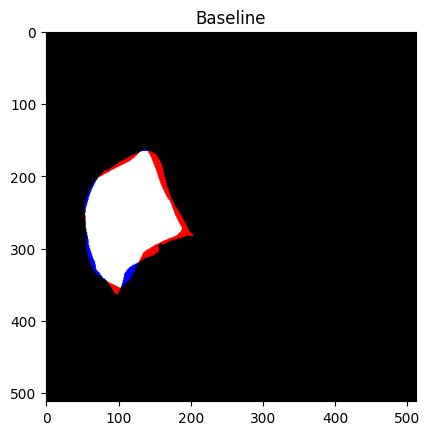

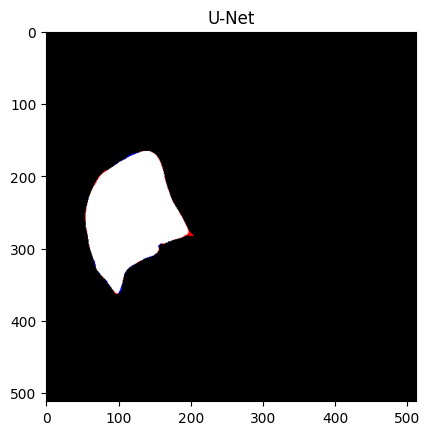

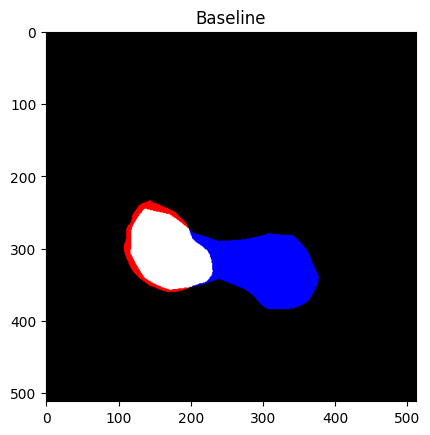

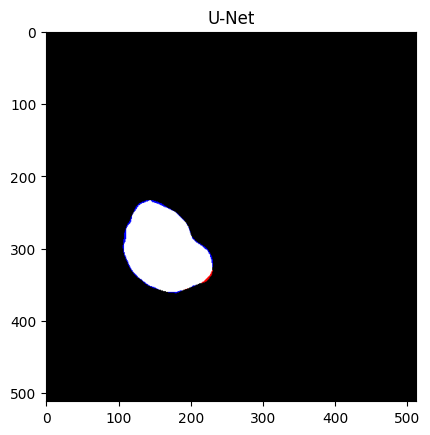

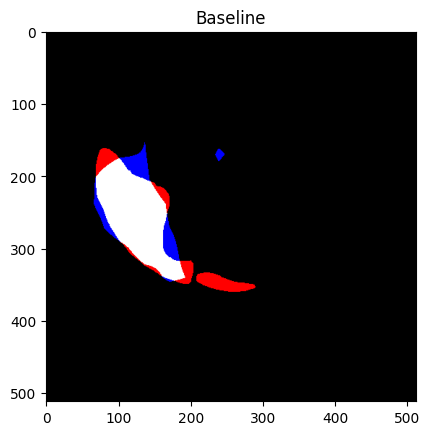

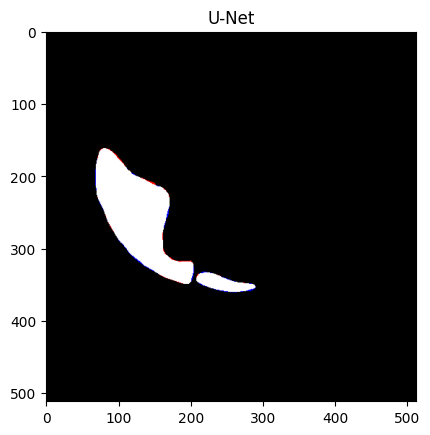

In [ ]:
codes = ["033", "158", "209"]
path_baseline = "/content/baseline/baseline_pred_output/"
path_unet = "/content/unet/unet_pred_output/"

for code in codes:
    baseline_img = np.asarray(Image.open(path_baseline + code + "_pred.png"))
    unet_img = np.asarray(Image.open(path_unet + code + "_pred.png"))
    mask_img = np.asarray(Image.open(code + "_mask.png"))
    img_b = color_img(baseline_img, mask_img)
    img_u = color_img(unet_img, mask_img)
    plt.imshow(img_b)
    plt.title("Baseline")
    plt.show()
    plt.imshow(img_u)
    plt.title("U-Net")
    plt.show()
    img_b = Image.fromarray(img_b.astype('uint8'), 'RGB')
    img_b.save(path_baseline + code + "_color.png")
    img_u = Image.fromarray(img_u.astype('uint8'), 'RGB')
    img_u.save(path_unet + code + "_color.png")